In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ConfusionMatrix

# Not being used, just to fix Yellowbrick's fonts missing bug
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "serif"

In [96]:
credito = pd.read_csv("../data/Credit.csv")

credito.head(10)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
5,'no checking',36,'existing paid',education,9055,'no known savings',1<=X<4,2,'male single',none,...,'no known property',35,none,'for free',1,'unskilled resident',2,yes,yes,good
6,'no checking',24,'existing paid',furniture/equipment,2835,500<=X<1000,>=7,3,'male single',none,...,'life insurance',53,none,own,1,skilled,1,none,yes,good
7,0<=X<200,36,'existing paid','used car',6948,<100,1<=X<4,2,'male single',none,...,car,35,none,rent,1,'high qualif/self emp/mgmt',1,yes,yes,good
8,'no checking',12,'existing paid',radio/tv,3059,>=1000,4<=X<7,2,'male div/sep',none,...,'real estate',61,none,own,1,'unskilled resident',1,none,yes,good
9,0<=X<200,30,'critical/other existing credit','new car',5234,<100,unemployed,4,'male mar/wid',none,...,car,28,none,own,2,'high qualif/self emp/mgmt',1,none,yes,bad


In [97]:
credito.shape

(1000, 21)

In [98]:
previsores = credito.iloc[:, 0:20].values
classe = credito.iloc[:, 20].values

In [99]:
previsores

array([['<0', 6, "'critical/other existing credit'", ..., 1, 'yes',
        'yes'],
       ['0<=X<200', 48, "'existing paid'", ..., 1, 'none', 'yes'],
       ["'no checking'", 12, "'critical/other existing credit'", ..., 2,
        'none', 'yes'],
       ...,
       ["'no checking'", 12, "'existing paid'", ..., 1, 'none', 'yes'],
       ['<0', 45, "'existing paid'", ..., 1, 'yes', 'yes'],
       ['0<=X<200', 45, "'critical/other existing credit'", ..., 1,
        'none', 'yes']], dtype=object)

In [100]:
labelEncoder = LabelEncoder()
previsores[:, 0] = labelEncoder.fit_transform(previsores[:, 0])
previsores[:, 2] = labelEncoder.fit_transform(previsores[:, 2])
previsores[:, 3] = labelEncoder.fit_transform(previsores[:, 3])
previsores[:, 5] = labelEncoder.fit_transform(previsores[:, 5])
previsores[:, 6] = labelEncoder.fit_transform(previsores[:, 6])
previsores[:, 8] = labelEncoder.fit_transform(previsores[:, 8])
previsores[:, 9] = labelEncoder.fit_transform(previsores[:, 9])
previsores[:, 11] = labelEncoder.fit_transform(previsores[:, 11])
previsores[:, 13] = labelEncoder.fit_transform(previsores[:, 13])
previsores[:, 14] = labelEncoder.fit_transform(previsores[:, 14])
previsores[:, 16] = labelEncoder.fit_transform(previsores[:, 16])
previsores[:, 18] = labelEncoder.fit_transform(previsores[:, 18])
previsores[:, 19] = labelEncoder.fit_transform(previsores[:, 19])

In [101]:
previsores

array([[2, 6, 1, ..., 1, 1, 1],
       [1, 48, 3, ..., 1, 0, 1],
       [0, 12, 1, ..., 2, 0, 1],
       ...,
       [0, 12, 3, ..., 1, 0, 1],
       [2, 45, 3, ..., 1, 1, 1],
       [1, 45, 1, ..., 1, 0, 1]], dtype=object)

In [102]:
X_treino, X_teste, y_treino, y_teste = train_test_split(
    previsores, classe, test_size=0.3, random_state=0
)

In [103]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_treino, y_treino)

GaussianNB()

In [104]:
previsoes = naive_bayes.predict(X_teste)
previsoes[:10]

array(['bad', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad'], dtype='<U4')

In [105]:
confusao = confusion_matrix(y_teste, previsoes)
confusao

array([[ 41,  45],
       [ 42, 172]])

In [106]:
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_acerto

0.71

In [107]:
taxa_erro = 1 - taxa_acerto
taxa_erro

0.29000000000000004

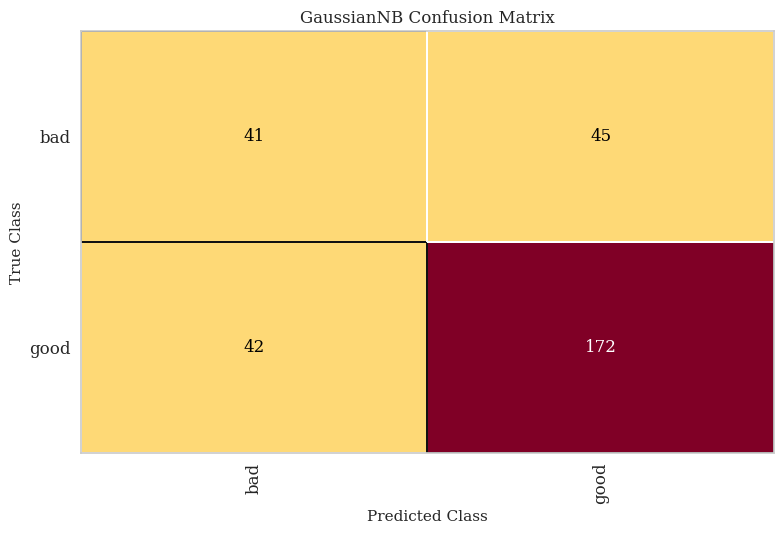

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [108]:
v = ConfusionMatrix(GaussianNB())
v.fit(X_treino, y_treino)
v.score(X_teste, y_teste)
v.show()

In [109]:
# Colocando em "produção", chegou um novo cliente

novo_credito = pd.read_csv("../data/NovoCredit.csv")
novo_credito

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,'no checking',12,'existing paid',radio/tv,804,<100,>=7,4,'male single',none,4,car,38,none,own,1,skilled,1,none,yes


In [110]:
novo_credito.shape

(1, 20)

In [111]:
type(novo_credito)

pandas.core.frame.DataFrame

In [112]:
novo_credito = novo_credito.iloc[:, 0:20].values
novo_credito

array([["'no checking'", 12, "'existing paid'", 'radio/tv', 804, '<100',
        '>=7', 4, "'male single'", 'none', 4, 'car', 38, 'none', 'own',
        1, 'skilled', 1, 'none', 'yes']], dtype=object)

In [113]:
type(novo_credito)

numpy.ndarray

In [114]:
novo_credito[:, 0] = labelenconder1.transform(novo_credito[:, 0])
novo_credito[:, 2] = labelenconder2.transform(novo_credito[:, 2])
novo_credito[:, 3] = labelenconder3.transform(novo_credito[:, 3])
novo_credito[:, 5] = labelenconder4.transform(novo_credito[:, 5])
novo_credito[:, 6] = labelenconder5.transform(novo_credito[:, 6])
novo_credito[:, 8] = labelenconder6.transform(novo_credito[:, 8])
novo_credito[:, 9] = labelenconder7.transform(novo_credito[:, 9])
novo_credito[:, 11] = labelenconder8.transform(novo_credito[:, 11])
novo_credito[:, 13] = labelenconder9.transform(novo_credito[:, 13])
novo_credito[:, 14] = labelenconder10.transform(novo_credito[:, 14])
novo_credito[:, 16] = labelenconder11.transform(novo_credito[:, 16])
novo_credito[:, 18] = labelenconder12.transform(novo_credito[:, 18])
novo_credito[:, 19] = labelenconder13.transform(novo_credito[:, 19])

In [115]:
# O novo cliente é um bom pagador ou não?
naive_bayes.predict(novo_credito)

print(
    "O novo cliente é um bom pagador!"
    if naive_bayes.predict(novo_credito)[0] == "good"
    else "O novo cliente é um mau pagador!"
)

print("Taxa de acerto: {:.2f}%".format(taxa_acerto * 100))

O novo cliente é um bom pagador!
Taxa de acerto: 71.00%
